In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
from analytics_labels import *
from analytics_functions import clean_activations

In [62]:


data = [
    {
        'vel': 3,
        'win_size': 30,
        'poly_n': 5,
        'obstacle': 'csv/0-vel-3-ws-30-polyn-5.csv',
        'no-obstacle': 'csv/0-vel-3-ws-30-polyn-5-no-obstacle.csv'
    },
    {
        'vel': 1,
        'win_size': 30,
        'poly_n': 5,
        'obstacle': 'csv/0-vel-1-ws-30-polyn-5.csv',
        'no-obstacle': 'csv/0-vel-1-ws-30-polyn-5-no-obstacle.csv'
    }
]



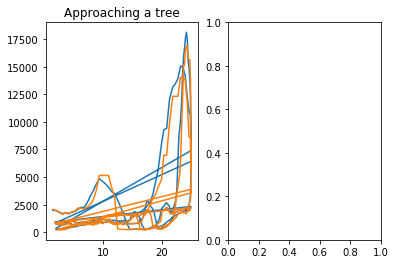

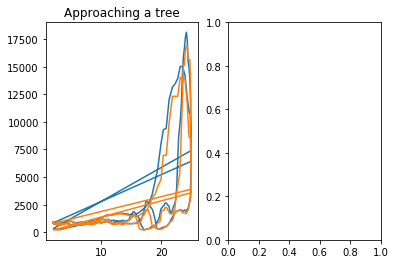

In [65]:

for dic in data:
    obst = pd.read_csv(dic['obstacle'])
    no_obst = pd.read_csv(dic['no-obstacle'])
    obst[ACT] = obst[ACT].apply(clean_activations)
    no_obst[ACT] = no_obst[ACT].apply(clean_activations)
    obst_means = obst[ACT].apply(np.mean)
    obst_medians = obst[ACT].apply(np.median)
    no_obst_means = no_obst[ACT].apply(np.mean)
    no_obst_meadians = no_obst[ACT].apply(np.median)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(obst[DIST], obst_means, label="Mean of activations")
    ax1.plot(obst[DIST], obst_medians, label="Median of activations")
    ax1.set_title("Approaching a tree")

